In [1]:
!wget https://github.com/kulvinu/Sinhala_Digits/archive/refs/heads/main.zip

!unzip main.zip

--2022-05-26 03:46:49--  https://github.com/kulvinu/Sinhala_Digits/archive/refs/heads/main.zip
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://github.com/kulvinu/ICAAT_Speech_Corpus/archive/refs/heads/main.zip [following]
--2022-05-26 03:46:49--  https://github.com/kulvinu/ICAAT_Speech_Corpus/archive/refs/heads/main.zip
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://codeload.github.com/kulvinu/ICAAT_Speech_Corpus/zip/refs/heads/main [following]
--2022-05-26 03:46:49--  https://codeload.github.com/kulvinu/ICAAT_Speech_Corpus/zip/refs/heads/main
Resolving codeload.github.com (codeload.github.com)... 140.82.113.10
Connecting to codeload.github.com (codeload.github.com)|140.82.113.10|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [appl

In [2]:
!pip install python_speech_features
!pip install tensorflow_io

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for python-speech-features: filename=python_speech_features-0.6-py3-none-any.whl size=5888 sha256=2060a0817716b7d885d59bcc13447defe4f76791ca4fa117a1412678898efd20
  Stored in directory: /root/.cache/pip/wheels/b0/0e/94/28cd6afa3cd5998a63eef99fe31777acd7d758f59cf24839eb
Successfully built python-speech-features
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 25.9 MB 33.6 MB/s 


In [3]:
# Importing Libraries
import os
import pandas as pd
from sklearn.model_selection import train_test_split
import pickle
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from IPython.display import HTML
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt
from scipy.io import wavfile as wav
import scipy
import scipy.signal as sps
from python_speech_features import mfcc
from python_speech_features import logfbank

In [4]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Flatten, Activation, Dropout, LSTM
from keras.layers import Conv2D, MaxPooling2D, GlobalMaxPooling2D, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow import keras
import tensorflow_io as tfio

In [5]:
sinsoundfile = os.listdir('/content/Sinhala_Recordings/')
data=[]
for i in sinsoundfile:
  (rate,sig) = wav.read(r'/content/Sinhala_Recordings/'+i)
  number_of_samples = round(len(sig) * float(16000) / rate)
  sig = sps.resample(sig, number_of_samples)
  data.append(sig)

In [6]:
#set the independent var
size = 48
X=[]
for i in range(len(data)):
  mfcc_feat = mfcc(data[i],rate,nfft=2048)
  mfcc_feat = np.resize(mfcc_feat, (size,13))
  X.append(mfcc_feat)
X = np.array(X)

In [7]:
#set the target label
y = [i[0] for i in sinsoundfile]
Y = pd.get_dummies(y)

In [8]:
print(Y[0:8])

   0  1  2  3  4  5  6  7  8  9
0  0  0  1  0  0  0  0  0  0  0
1  0  1  0  0  0  0  0  0  0  0
2  0  0  0  0  0  0  0  0  1  0
3  0  0  0  0  0  0  0  0  0  1
4  0  0  0  0  0  0  1  0  0  0
5  0  1  0  0  0  0  0  0  0  0
6  0  0  0  0  0  0  0  0  0  1
7  0  0  0  0  0  1  0  0  0  0


In [9]:
Y = np.array(Y)

In [10]:
print(X.shape)

(700, 48, 13)


In [11]:
print(Y.shape)

(700, 10)


In [12]:
model = Sequential()
#Convolution layers
model.add(Conv2D(8, (3, 3), activation='relu', input_shape=(size, 13,1)))
model.add(Conv2D(8, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.1))
#Flattening
model.add(Flatten(input_shape=(size, 13,1)))
#1st fully connected Neural Network hidden-layer
model.add(Dense(64))
model.add(Dropout(0.16))
model.add(Activation('relu'))
#2nd fully connected Neural Network hidden-layer
model.add(Dense(64))
model.add(Dropout(0.12))
model.add(Activation('relu'))
#Output layer
model.add(Dense(10))
model.add(Activation('softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 46, 11, 8)         80        
                                                                 
 conv2d_1 (Conv2D)           (None, 44, 9, 8)          584       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 22, 4, 8)         0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 22, 4, 8)          0         
                                                                 
 flatten (Flatten)           (None, 704)               0         
                                                                 
 dense (Dense)               (None, 64)                45120     
                                                        

In [13]:
adam = Adam(learning_rate=0.001)
model.compile(loss='categorical_crossentropy',
optimizer=adam,
metrics=['accuracy'])

In [14]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.10)
x_train = x_train.reshape(-1, size, 13, 1)
x_test = x_test.reshape(-1, size, 13, 1)

In [15]:
history = model.fit(
x_train,
y_train,
epochs=100,
batch_size=32,
validation_split=0.2,
shuffle=True
)

Epoch 1/100
16/16 [==============================] - 2s 55ms/step - loss: 4.0577 - accuracy: 0.1548 - val_loss: 2.2650 - val_accuracy: 0.1270
Epoch 2/100
16/16 [==============================] - 0s 30ms/step - loss: 2.3050 - accuracy: 0.1607 - val_loss: 1.9993 - val_accuracy: 0.2937
Epoch 3/100
16/16 [==============================] - 0s 27ms/step - loss: 1.9223 - accuracy: 0.3373 - val_loss: 1.7339 - val_accuracy: 0.3810
Epoch 4/100
16/16 [==============================] - 0s 26ms/step - loss: 1.6247 - accuracy: 0.4147 - val_loss: 1.2585 - val_accuracy: 0.5000
Epoch 5/100
16/16 [==============================] - 0s 31ms/step - loss: 1.3696 - accuracy: 0.5060 - val_loss: 1.0811 - val_accuracy: 0.6190
Epoch 6/100
16/16 [==============================] - 0s 28ms/step - loss: 1.0981 - accuracy: 0.6071 - val_loss: 0.9690 - val_accuracy: 0.6270
Epoch 7/100
16/16 [==============================] - 0s 23ms/step - loss: 0.9434 - accuracy: 0.6448 - val_loss: 0.8109 - val_accuracy: 0.7222
Epoch 

In [16]:
model.evaluate(x_test, y_test, verbose=2)

3/3 - 0s - loss: 0.4230 - accuracy: 0.8857 - 25ms/epoch - 8ms/step


[0.42303410172462463, 0.8857142925262451]

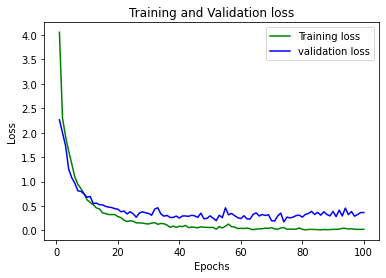

In [17]:
loss_train = (history.history['loss'])
loss_val = (history.history['val_loss'])
epochs = range(1,101)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

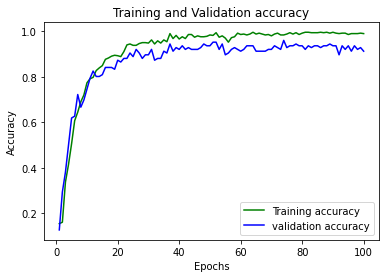

In [18]:
loss_train = (history.history['accuracy'])
loss_val = (history.history['val_accuracy'])
epochs = range(1,101)
plt.plot(epochs, loss_train, 'g', label='Training accuracy')
plt.plot(epochs, loss_val, 'b', label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [19]:
#Print the sound to be predicted
sound_index = 10
y_test[sound_index]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1], dtype=uint8)

In [20]:
pred = model.predict(x_test[sound_index].reshape(-1,size,13,1))

In [21]:
print("\n\033[1mPredicted digit sound: %.0f"%pred.argmax(),"\033[0m \n ")
print("Predicted probability array:")
print(pred)


Predicted digit sound: 9  
 
Predicted probability array:
[[7.7948535e-08 6.6000353e-14 7.7878676e-12 1.7100817e-09 9.6950714e-10
  2.4298742e-11 2.1823816e-09 6.0541832e-12 4.0863073e-05 9.9995899e-01]]


In [22]:
!mkdir -p saved_model
model.save('saved_model/my_model') 

INFO:tensorflow:Assets written to: saved_model/my_model/assets


In [23]:
!zip -r /content/model.zip /content/saved_model

  adding: content/saved_model/ (stored 0%)
  adding: content/saved_model/my_model/ (stored 0%)
  adding: content/saved_model/my_model/variables/ (stored 0%)
  adding: content/saved_model/my_model/variables/variables.data-00000-of-00001 (deflated 10%)
  adding: content/saved_model/my_model/variables/variables.index (deflated 67%)
  adding: content/saved_model/my_model/saved_model.pb (deflated 90%)
  adding: content/saved_model/my_model/assets/ (stored 0%)
  adding: content/saved_model/my_model/keras_metadata.pb (deflated 91%)
